In [1]:
import requests
import pandas as pd
import csv
import os
import sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Change directory to project root directory
os.chdir("..")

#Import custom code
from src.code_flow.CreateJupyterNotebookHeadings import jupyternotebookheadings1, jupyternotebookheadings2

In [2]:
df=pd.read_csv('data/interim/diabetes_post_wrangling.csv',index_col=0)

In [3]:
def region_label(x):
    if x in Northeast:
        return "Northeast"
    if x in West:
        return "West"
    if x in Midwest:
        return "Midwest"
    if x in South:
        return "South"

Northeast=['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey','Delaware', 'Maryland', 'District of Columbia']
Midwest=['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South=['Puerto Rico', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West=['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [4]:
df['region']=df.state.apply(region_label)

In [5]:
#Reorder Columns
df=df[['state', 'county','region', 'county_fips', 'state_fips', 'year',
        'total_pop','population','female','male',
        'white_pop','black_pop', 'amer_indian_pop', 
        'pacific_island_pop', 'asian_pop','hispanic_pop','other_pop',
        'median_income','education_bach', 'education_hs',
        '25_34_years','35_44_years', '45_54_years', '55_59_years', '60_64_years',
        '65_74_years', '75_84_years', '85_plus_years',
        'diabetes_%', 'diabetes_%_lower','diabetes_%_upper']]

In [7]:
cols=df.columns[df.dtypes.ne('object')]
df_no_string=df[cols]

In [8]:
df[3200:3400]

,state,county,region,county_fips,state_fips,year,total_pop,population,female,male,white_pop,black_pop,amer_indian_pop,pacific_island_pop,asian_pop,hispanic_pop,other_pop,median_income,education_bach,education_hs,25_34_years,35_44_years,45_54_years,55_59_years,60_64_years,65_74_years,75_84_years,85_plus_years,diabetes_%,diabetes_%_lower,diabetes_%_upper
3200,California,El Dorado County,West,17,6,2009,178447.0,180455.0,88218.0,90229.0,7830.0,178447.0,21607.0,389.0,17851.0,156840.0,206.0,4141.0,31.9,93.5,23526.0,33149.0,13971.0,12953.0,13323.0,6849.0,2250.0,42.5,6.5,5.2,8.1
3201,California,El Dorado County,West,17,6,2010,181194.0,181058.0,90022.0,91172.0,4379.0,181194.0,22065.0,1124.0,16899.0,159129.0,0.0,66129.0,-888888888.0,-888888888.0,22011.0,31956.0,15137.0,13240.0,15014.0,7852.0,3496.0,42.5,6.8,5.3,8.3
3202,California,El Dorado County,West,17,6,2011,180938.0,180936.0,90853.0,90085.0,7051.0,180938.0,22241.0,1122.0,17807.0,158697.0,506.0,61084.0,-888888888.0,-888888888.0,21132.0,32422.0,14855.0,14704.0,16291.0,7315.0,3922.0,44.6,6.7,5.3,8.4
3203,California,El Dorado County,West,17,6,2012,180561.0,180575.0,90010.0,90551.0,9358.0,180561.0,22083.0,697.0,19376.0,158478.0,189.0,69973.0,-888888888.0,-888888888.0,20541.0,30383.0,15140.0,13975.0,17865.0,8611.0,3647.0,44.7,6.4,5.0,8.2
3204,California,El Dorado County,West,17,6,2013,181737.0,181481.0,90830.0,90907.0,6120.0,181737.0,22661.0,715.0,18140.0,159076.0,58.0,61365.0,-888888888.0,-888888888.0,20571.0,28010.0,16773.0,13173.0,19914.0,8777.0,3291.0,44.5,6.0,4.6,7.7
3205,California,El Dorado County,West,17,6,2014,183087.0,183108.0,91560.0,91527.0,5625.0,183087.0,23205.0,165.0,20465.0,159882.0,0.0,71113.0,-888888888.0,-888888888.0,20524.0,27342.0,15295.0,15703.0,20542.0,9707.0,2723.0,44.9,6.0,4.5,7.8
3206,California,El Dorado County,West,17,6,2015,184452.0,184569.0,92030.0,92422.0,4800.0,184452.0,23632.0,574.0,17907.0,160820.0,76.0,79019.0,-888888888.0,-888888888.0,19912.0,27596.0,16905.0,14254.0,21953.0,10067.0,3269.0,45.4,5.9,4.4,7.8
3207,California,El Dorado County,West,17,6,2016,185625.0,185976.0,92178.0,93447.0,4552.0,185625.0,23699.0,241.0,19788.0,161926.0,434.0,75772.0,-888888888.0,-888888888.0,21081.0,27621.0,17435.0,14843.0,22049.0,8337.0,5243.0,46.1,6.2,4.0,9.2
3208,California,El Dorado County,West,17,6,2017,188987.0,188679.0,94496.0,94491.0,173974.0,2868.0,4015.0,951.0,11657.0,24278.0,3650.0,79414.0,-888888888.0,-888888888.0,18976.0,21815.0,25663.0,16037.0,16334.0,24079.0,10814.0,3564.0,5.9,4.0,8.1
3209,California,El Dorado County,West,17,6,2018,190678.0,190746.0,96151.0,94527.0,176608.0,2766.0,3969.0,-999999999.0,11773.0,24640.0,2885.0,82742.0,49872.0,131441.0,18139.0,21995.0,25406.0,15570.0,17311.0,25428.0,10546.0,4453.0,NaN,NaN,NaN


In [19]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col]=np.where(df[col]<0,0,df[col])

In [14]:
df.iloc[3201,18]<0

True

In [29]:
df[6200:6400]

,state,county,region,county_fips,state_fips,year,total_pop,population,female,male,white_pop,black_pop,amer_indian_pop,pacific_island_pop,asian_pop,hispanic_pop,other_pop,median_income,education_bach,education_hs,25_34_years,35_44_years,45_54_years,55_59_years,60_64_years,65_74_years,75_84_years,85_plus_years,diabetes_%,diabetes_%_lower,diabetes_%_upper
6200,Florida,Suwannee County,South,121,12,2005,NaN,38687.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,6.8,10.3
6201,Florida,Suwannee County,South,121,12,2006,NaN,39533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,7.7,10.5
6202,Florida,Suwannee County,South,121,12,2007,NaN,40309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,7.9,10.8
6203,Florida,Suwannee County,South,121,12,2008,NaN,40774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,8.1,11.2
6204,Florida,Suwannee County,South,121,12,2009,NaN,41263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.8,8.3,11.6
6205,Florida,Suwannee County,South,121,12,2010,NaN,41551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3,8.6,12.0
6206,Florida,Suwannee County,South,121,12,2011,NaN,43368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8,9.1,12.7
6207,Florida,Suwannee County,South,121,12,2012,NaN,43534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,9.9,13.9
6208,Florida,Suwannee County,South,121,12,2013,NaN,43588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4,9.4,13.5
6209,Florida,Suwannee County,South,121,12,2014,NaN,43786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3,9.4,13.3


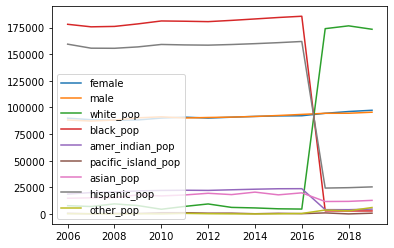

In [25]:
df_=df[(df.state=='California') & (df.county=='El Dorado County')]
for var in ['female','male',
        'white_pop','black_pop', 'amer_indian_pop', 
        'pacific_island_pop', 'asian_pop','hispanic_pop','other_pop']:
    plt.plot(df_.year,df_[var],label=var)
plt.legend(loc=3)
plt.show()

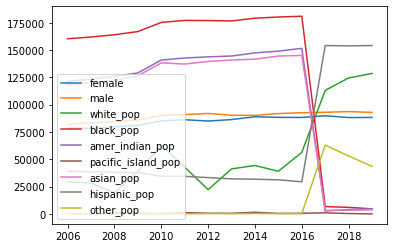

In [27]:
df_=df[(df.state=='California') & (df.county=='Imperial County')]
for var in ['female','male',
        'white_pop','black_pop', 'amer_indian_pop', 
        'pacific_island_pop', 'asian_pop','hispanic_pop','other_pop']:
    plt.plot(df_.year,df_[var],label=var)
plt.legend(loc=3)
plt.show()

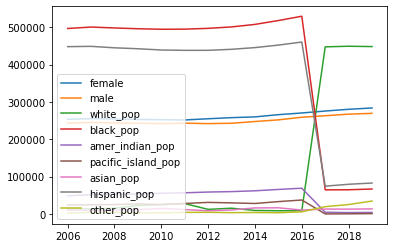

In [31]:
df_=df[(df.state=='Florida') & (df.county=='Volusia County')]
for var in ['female','male',
        'white_pop','black_pop', 'amer_indian_pop', 
        'pacific_island_pop', 'asian_pop','hispanic_pop','other_pop']:
    plt.plot(df_.year,df_[var],label=var)
plt.legend(loc=3)
plt.show()